In [1]:
# visulize the convergance of the numerical method

import sys
import petsc4py

petsc4py.init(sys.argv)

%pylab inline
pylab.rcParams['figure.figsize'] = (18.5, 10.5)
import numpy as np
from src import stokes_flow as sf
from petsc4py import PETSc
import os
from scipy.io import loadmat, savemat
import matplotlib.pyplot as plt
from codeStore import support_fun as spf

PWD = os.getcwd()
fontsize = 40
np.set_printoptions(linewidth=110, precision=5)

Populating the interactive namespace from numpy and matplotlib


In [12]:
# for the paper m2, test the relative error between numerical and analytical values of uz
mat_contents = loadmat('convergence_z.mat')
b = mat_contents['b'][0]
z1 = mat_contents['z1'][0]
IDX = z1 > 0.013
z1 = z1[IDX]
R1 = mat_contents['R1'][0][IDX]
phi1 = mat_contents['phi1'][0][IDX]
uz = mat_contents['u_struct'][0][-1][3][0][IDX]
nodes = np.vstack((R1 * np.cos(phi1), R1 * np.sin(phi1), z1)).T

fileHeadle = 'R09l20'
problem_kwargs = {
    'name':                        'force_pipe',
    'matrix_method':               'pf_stokesletsInPipe',
    'dp':                          -1,
    'ep':                          -1,
    'lp':                          -1,
    'rp':                          1,
    'b0':                          -1,
    'b1':                          -1,
    'nb':                          -1,
    'th':                          -1,
    'stokesletsInPipe_pipeFactor': -1,
    'solve_method':                'gmres',
    'precondition_method':         'none',
    'fileHeadle':                  fileHeadle,
    'check_acc':                   1,
    'plot_geo':                    0,
    'MPISIZE':                     0,
    'ffweightx':                   1,
    'ffweighty':                   1,
    'ffweightz':                   1,
    'ffweightT':                   1,
    'zoom_factor':                 1,
}
    
problem = sf.stokesletsInPipeforcefreeProblem(**problem_kwargs)
problem.set_prepare(fileHeadle)
_, _, num_ans3 = problem.debug_solve_stokeslets_b(b=b, node=nodes)
num_uz = num_ans3.getArray().reshape((-1, 3))[:, 2]
savemat('num_uz.mat',
        {'z1_use': z1,
         'uz_use': uz,
         'num_uz': num_uz, },
        oned_as='column')

# print('analytical, numerical, abs_err, relative_err')
# print(np.vstack((z1, uz, num_uz, num_uz - uz, (num_uz - uz) / uz)).T)

slope=1.114442 in range (0.01, 0.3)


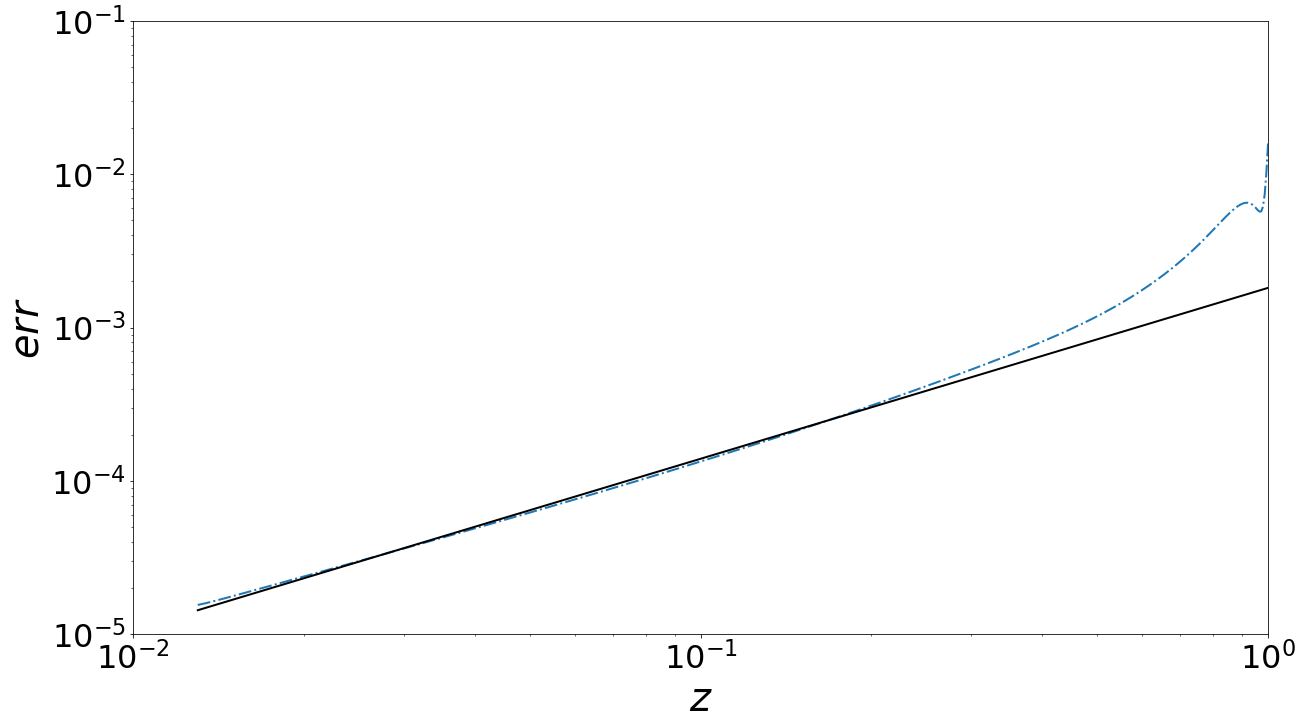

In [14]:
fig = plt.figure()
fig.patch.set_facecolor('white')
ax1 = fig.add_subplot(1, 1, 1)
rel_err = np.abs((num_uz - uz) / uz)
# print(rel_err)
ax1.loglog(z1, rel_err, linestyle='-.', linewidth=2)
spf.fit_power_law(ax1, z1, rel_err, 0.01, 0.3, linestyle='-', linewidth=2)
ax1.set_xlabel('$z$', size=fontsize)
ax1.set_ylabel('$err$', size=fontsize)
ax1.set_xlim(0.01, 1)
ax1.set_ylim(10**-5, 10**-1)
plt.sca(ax1)
plt.xticks(fontsize=fontsize*0.8)
plt.yticks(fontsize=fontsize*0.8)
plt.tight_layout()
